This is the actual notebook you want to run

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from xgboost import XGBRegressor

from data_dicts_values import drop_cols
from data_prep_values import county_info_2012, county_info_2016, county_info_2018, results_info
from model_prep import lin_mod_func, run_model, make_predictions, combine_predictions
from visualizations import display_results

In [60]:
features_2012 = county_info_2012()
features_2016 = county_info_2016()
features_2018 = county_info_2018()
results_2012 = results_info(2012)
results_2016 = results_info(2016)

In [61]:
df_2012 = pd.merge(features_2012, results_2012, on='County')
df_2012 = df_2012.drop(columns='State_y')
df_2012 = df_2012.rename(columns={'State_x': 'State'})

In [62]:
df_2016 = pd.merge(features_2016, results_2016, on='County')
df_2016 = df_2016.drop(columns='State_y')
df_2016 = df_2016.rename(columns={'State_x': 'State'})

In [74]:
df_2012.columns.tolist()

['County',
 'State',
 'Total population',
 'Median age',
 'Sex ratio (males per 100 females)',
 'Male Median age',
 'Female Median age',
 'Total White',
 'Total Black or African American',
 'Total American Indian and Alaska Native',
 'Total Asian',
 'Total Hispanic or Latino',
 'Households Median income',
 'Households Mean income',
 'Total Less than 9th grade',
 'Total 9th to 12th grade, no diploma',
 'Total High school graduate',
 'Total Some college, no degree',
 "Total Associate's degree",
 "Total Bachelor's degree",
 'Total Graduate or professional degree',
 'Republican',
 'Democrat',
 'Other']

In [139]:
df_2012.iloc[df_2012['Total population'].idxmax()]

County                                     Los Angeles County, California, 2012
State                                                                California
Total population                                                        9840024
Median age                                                                 34.8
Sex ratio (males per 100 females)                                          97.3
Male Median age                                                            33.6
Female Median age                                                            36
Total White                                                               69453
Total Black or African American                                           11233
Total American Indian and Alaska Native                                     924
Total Asian                                                                1145
Total Hispanic or Latino                                                  83313
Households Median income                

In [63]:
selected_features = ['Median age',
                     'Sex ratio (males per 100 females)',
                     'Households Median income',
                     'Total Graduate or professional degree',
                     'Total Black or African American']

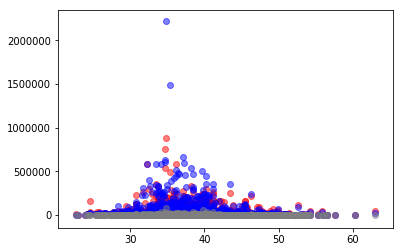

In [73]:
plt.scatter(df_2012['Median age'], df_2012['Republican'], c='red', alpha=0.5)
plt.scatter(df_2012['Median age'], df_2012['Democrat'], c='blue', alpha=0.5)
plt.scatter(df_2012['Median age'], df_2012['Other'], c='gray', alpha=0.5)
plt.show()

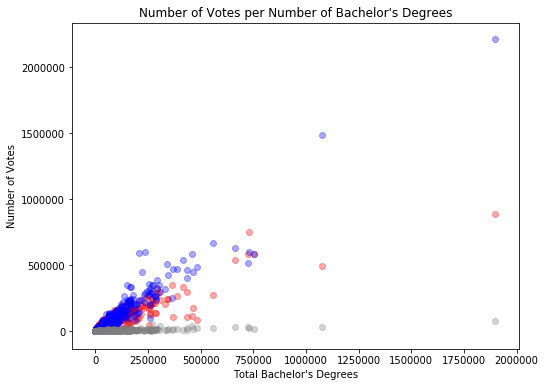

In [92]:
plt.figure(figsize=[8,6])
plt.scatter(df_2012["Total Bachelor's degree"], df_2012['Republican'], c='red', alpha=0.333)
plt.scatter(df_2012["Total Bachelor's degree"], df_2012['Democrat'], c='blue', alpha=0.333)
plt.scatter(df_2012["Total Bachelor's degree"], df_2012['Other'], c='gray', alpha=0.333)
plt.title("Number of Votes per Number of Bachelor's Degrees")
plt.xlabel("Total Bachelor's Degrees")
plt.ylabel("Number of Votes")
#plt.xticks(ticks=[1,2,3])
plt.show()

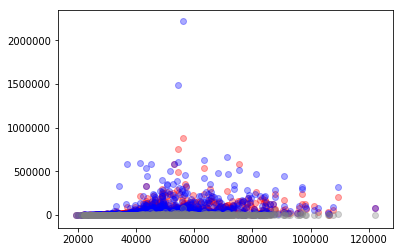

In [140]:
plt.scatter(df_2012['Households Median income'], df_2012['Republican'], c='red', alpha=0.333)
plt.scatter(df_2012['Households Median income'], df_2012['Democrat'], c='blue', alpha=0.333)
plt.scatter(df_2012['Households Median income'], df_2012['Other'], c='gray', alpha=0.333)
plt.show()

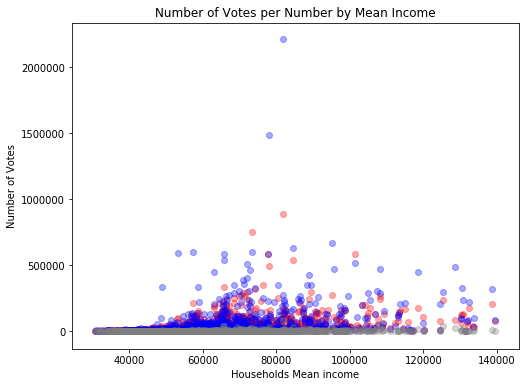

In [95]:
plt.figure(figsize=[8,6])
plt.scatter(df_2012['Households Mean income'], df_2012['Republican'], c='red', alpha=0.333)
plt.scatter(df_2012['Households Mean income'], df_2012['Democrat'], c='blue', alpha=0.333)
plt.scatter(df_2012['Households Mean income'], df_2012['Other'], c='gray', alpha=0.333)
plt.title("Number of Votes per Number by Mean Income")
plt.xlabel("Households Mean income")
plt.ylabel("Number of Votes")
#plt.xticks(ticks=[1,2,3])
plt.show()

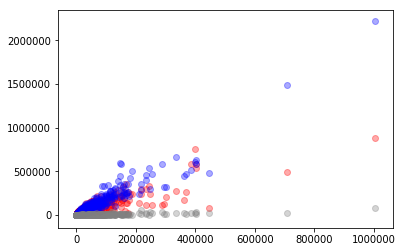

In [79]:
plt.scatter(df_2012['Total Graduate or professional degree'], df_2012['Republican'], c='red', alpha=0.333)
plt.scatter(df_2012['Total Graduate or professional degree'], df_2012['Democrat'], c='blue', alpha=0.333)
plt.scatter(df_2012['Total Graduate or professional degree'], df_2012['Other'], c='gray', alpha=0.333)
plt.show()

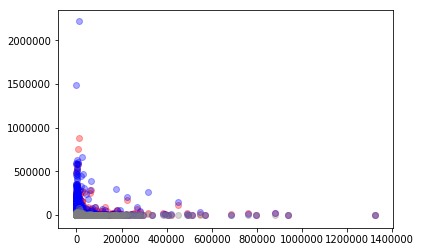

In [82]:
plt.scatter(df_2012['Total Black or African American'], df_2012['Republican'], c='red', alpha=0.333)
plt.scatter(df_2012['Total Black or African American'], df_2012['Democrat'], c='blue', alpha=0.333)
plt.scatter(df_2012['Total Black or African American'], df_2012['Other'], c='gray', alpha=0.333)
plt.show()

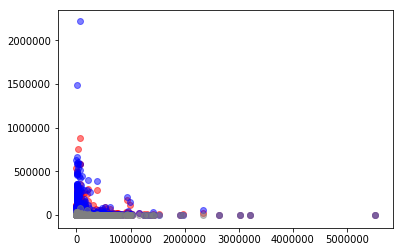

In [94]:
plt.scatter(df_2012['Total White'], df_2012['Republican'], c='red', alpha=0.5)
plt.scatter(df_2012['Total White'], df_2012['Democrat'], c='blue', alpha=0.5)
plt.scatter(df_2012['Total White'], df_2012['Other'], c='gray', alpha=0.5)
plt.show()

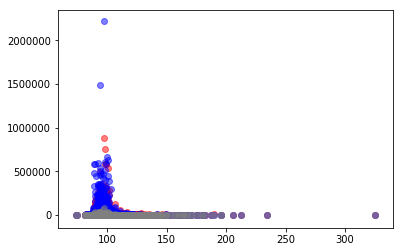

In [83]:
plt.scatter(df_2012['Sex ratio (males per 100 females)'], df_2012['Republican'], c='red', alpha=0.5)
plt.scatter(df_2012['Sex ratio (males per 100 females)'], df_2012['Democrat'], c='blue', alpha=0.5)
plt.scatter(df_2012['Sex ratio (males per 100 females)'], df_2012['Other'], c='gray', alpha=0.5)
plt.show()

In [5]:
X_train = df_2012.drop(columns=drop_cols)
X_test = df_2016.drop(columns=drop_cols)
scaler = StandardScaler()
mms = MinMaxScaler()
mms.fit(X_train)
#scaler.fit(X_train)

X_train_scale = mms.transform(X_train)
X_test_scale = mms.transform(X_test)
# X_train_scale = scaler.transform(X_train)
# X_test_scale = scaler.transform(X_test)

y_train_R = df_2012['Republican']
y_train_D = df_2012['Democrat']
y_train_O = df_2012['Other']

y_test_R = df_2016['Republican']
y_test_D = df_2016['Democrat']
y_test_O = df_2016['Other']

XGB = XGBRegressor(random_state=2020)

parameters = {}

# parameters = {'max_depth': [4, 5, 6, 7, 8],
#               'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
#              }

In [6]:
X_train

,Median age,Sex ratio (males per 100 females),Male Median age,Female Median age,Total White,Total Black or African American,Total American Indian and Alaska Native,Total Asian,Total Hispanic or Latino,Households Median income,Households Mean income,Total Less than 9th grade,"Total 9th to 12th grade, no diploma",Total High school graduate,"Total Some college, no degree",Total Associate's degree,Total Bachelor's degree,Total Graduate or professional degree
0,42.1,99.0,40.7,43.1,43841,10126,523,672,54590,42738,55059,697.671,1176.669,3988.179,2405.403,499.824,676.845,333.216
1,37.3,88.1,34.4,39.7,160739,18164,2584,1985,183226,27219,41342,2142.954,3701.466,5238.332,4350.846,2034.724,1904.848,952.424
2,39.8,100.5,37.1,41.9,13816,12993,368,310,27469,32087,45426,731.965,1700.411,3355.778,2657.596,585.572,889.619,506.745
3,39.6,94.2,38.2,40.7,17661,5171,131,40,22769,31743,41421,2793.684,3847.442,10978.688,4362.068,1004.746,1470.360,710.674
4,43.4,95.8,42.3,44.7,55359,1023,710,191,57466,33479,46789,1191.030,2361.525,8583.630,5359.635,1416.915,1622.265,780.330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3058,42.6,96.9,40.8,44.4,16349,1275,129,160,17747,45287,58885,1282.905,2230.281,9671.130,5407.938,1263.168,2151.333,809.217
3059,36.2,98.3,35.2,37.0,6111,566,15,10,6679,66422,91107,25666.984,39417.154,154460.243,112751.394,30708.713,96251.190,42167.188
3060,30.8,104.6,29.4,31.7,30934,9152,512,3222,43223,48489,57963,3852.405,3025.335,4178.880,4374.765,1197.075,2002.380,870.600
3061,43.0,92.5,41.1,44.5,144673,69450,2491,8839,223233,39122,50444,826.496,1536.766,3732.146,2879.822,1149.346,1201.002,723.184


In [7]:
model_tuned_R = GridSearchCV(XGB, parameters, cv=5, n_jobs= -1)
model_tuned_R.fit(X_train_scale, y_train_R)
model_tuned_R.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=2020,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1)

In [8]:
model_tuned_D = GridSearchCV(XGB, parameters, cv=5, n_jobs= -1)
model_tuned_D.fit(X_train_scale, y_train_D)
model_tuned_D.best_estimator_

/Users/stevedye/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=2020,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1)

In [9]:
# model_tuned_O = GridSearchCV(XGB, parameters, cv=5, n_jobs= -1)

model_tuned_O = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bytree=1, gamma=0, learning_rate=0.3, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=2020,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1)

model_tuned_O.fit(X_train_scale, y_train_O)
#model_tuned_O.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bytree=1, gamma=0, learning_rate=0.3, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=2020,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1)

In [10]:
print(model_tuned_R.best_estimator_)
print(model_tuned_D.best_estimator_)
#print(model_tuned_O.best_estimator_)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=2020,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1)
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=2020,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1)


In [11]:
# GridSearchCV(cv=5, error_score='raise-deprecating',
#              estimator=XGBRegressor(base_score=0.5, booster='gbtree',
#                                     colsample_bylevel=1, colsample_bytree=1,
#                                     gamma=0, learning_rate=0.1,
#                                     max_delta_step=0, max_depth=3,
#                                     min_child_weight=1, missing=None,
#                                     n_estimators=100, n_jobs=1, nthread=None,
#                                     objective='reg:linear', random_state=2020,
#                                     reg_alpha=0, reg_lambda=1,
#                                     scale_pos_weight=1, seed=None, silent=True,
#                                     subsample=1),
#              iid='warn', n_jobs=-1,
#              param_grid={'learning_rate': [0.2, 0.3, 0.4],
#                          'max_depth': [5, 6, 7]},
#              pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
#              scoring=None, verbose=0)

In [12]:
predictions_R = make_predictions('Republican', model_tuned_R, X_test_scale, y_test_R, df_2016)
predictions_D = make_predictions('Democrat', model_tuned_D, X_test_scale, y_test_D, df_2016)
predictions_O = make_predictions('Other', model_tuned_O, X_test_scale, y_test_O, df_2016)

In [13]:
predictions_2016 = combine_predictions(predictions_R, predictions_D,
                                       predictions_O, df_2016)

In [14]:
predictions_2016 = predictions_2016.drop(columns=['Republican_y', 'Democrat_y', 'Other_y'])
predictions_2016 = predictions_2016.rename(columns={'Republican_x': 'Republican',
                                                    'Democrat_x': 'Democrat',
                                                    'Other_x': 'Other'})

In [15]:
predictions_2016.sample(5)

,State,County,Total population,Republican,Republican Predictions,Democrat,Democrat Predictions,Other,Other Predictions
2245,Oregon,"Jackson County, Oregon, 2016",210916,53870,45645.554688,44447,65525.136719,11010,827.271912
365,Florida,"Duval County, Florida, 2016",900890,211672,90230.687500,205704,81356.820312,15319,5199.814453
2014,Tennessee,"Marshall County, Tennessee, 2016",31335,8184,13516.419922,2852,8961.972656,419,-257.926453
937,Iowa,"Linn County, Iowa, 2016",218076,48390,37231.089844,58935,17412.539062,9773,-259.217194
1638,North Carolina,"Watauga County, North Carolina, 2016",52745,13697,23750.490234,14138,9647.236328,2150,-25.212166


In [16]:
states = predictions_2016.State.unique().tolist()

interests = ['Republican','Republican Predictions',
             'Democrat', 'Democrat Predictions',
             'Other','Other Predictions']

interests2 = ['County','Republican','Republican Predictions',
              'Democrat', 'Democrat Predictions', 'Other','Other Predictions']

In [17]:
predictions_2016[interests2].sample(5)

,County,Republican,Republican Predictions,Democrat,Democrat Predictions,Other,Other Predictions
2287,"Cumberland County, Pennsylvania, 2016",69076,42200.539062,47085,44619.406250,5456,2804.308105
1979,"Brunswick County, North Carolina, 2016",42720,36497.351562,23282,17747.613281,2349,-366.833252
1227,"Charles County, Maryland, 2016",25614,30375.884766,49341,27122.001953,3348,570.210205
509,"Lowndes County, Georgia, 2016",21635,39873.855469,15064,14928.945312,1106,970.561523
2805,"Webb County, Texas, 2016",12947,53218.234375,42307,30895.761719,1651,-595.074036


In [106]:
predictions_2016[interests2].sample(10).round(0)

,County,Republican,Republican Predictions,Democrat,Democrat Predictions,Other,Other Predictions
574,"Wilkes County, Georgia, 2016",2572,6570.0,1848,8850.0,66,-30.0
1880,"Colfax County, New Mexico, 2016",2585,6193.0,2129,9675.0,618,216.0
2507,"James City County, Virginia, 2016",21306,23796.0,19105,16100.0,2762,920.0
344,"Middlesex County, Connecticut, 2016",38867,20862.0,45357,24172.0,4400,615.0
654,"Breckinridge County, Kentucky, 2016",6484,8044.0,1960,9205.0,330,33.0
2615,"Cooke County, Texas, 2016",13181,21759.0,2352,9525.0,422,90.0
1864,"Hunterdon County, New Jersey, 2016",38712,22977.0,28898,33252.0,3226,8.0
160,"Hamilton County, Illinois, 2016",3206,4968.0,802,8709.0,158,-153.0
1421,"Wilkin County, Minnesota, 2016",2129,8283.0,893,8527.0,280,-198.0
2269,"Armstrong County, Pennsylvania, 2016",23484,21946.0,7178,17272.0,956,2172.0


In [117]:
#predictions_2016

In [18]:
state_results = pd.DataFrame(states)
results = pd.DataFrame()
state_results = state_results.rename(columns={0: 'State'})
for state in states:
    results = results.append(predictions_2016[predictions_2016.State == state][interests].sum(),
                                     ignore_index=True)

state_results = state_results.merge(results, left_index=True, right_index=True)
state_results['Winner'] = state_results['Democrat Predictions'] - state_results['Republican Predictions']

In [19]:
state_results

,State,Democrat,Democrat Predictions,Other,Other Predictions,Republican,Republican Predictions,Winner
0,Alabama,729547.0,1.649412e+06,75570.0,152670.468840,1318250.0,1.511366e+06,1.380465e+05
1,Arizona,1161167.0,5.074493e+05,190709.0,7232.203552,1252401.0,6.721044e+05,-1.646551e+05
2,Arkansas,380494.0,7.792830e+05,64530.0,874.535194,684872.0,1.183686e+06,-4.044031e+05
3,Illinois,3090729.0,2.467440e+06,321963.0,39052.019651,2146015.0,2.044279e+06,4.231609e+05
4,California,8753788.0,2.954160e+06,943997.0,39859.868814,4483810.0,2.800429e+06,1.537316e+05
5,Colorado,1338870.0,2.135597e+06,238866.0,63464.068051,1202484.0,1.048732e+06,1.086864e+06
6,Connecticut,897572.0,1.338467e+06,74133.0,55105.636574,673215.0,3.004621e+05,1.038005e+06
7,Delaware,235603.0,3.055584e+05,22267.0,9845.687134,185127.0,1.085232e+05,1.970353e+05
8,Florida,4501194.0,4.813961e+06,296919.0,111863.719619,4611108.0,2.248907e+06,2.565053e+06
9,Georgia,1877963.0,2.697764e+06,147644.0,37976.064429,2089104.0,2.940896e+06,-2.431314e+05


In [20]:
print(state_results['Democrat Predictions'].sum(),
      state_results['Republican Predictions'].sum(),
      state_results['Other Predictions'].sum())

print(state_results['Democrat'].sum(),
      state_results['Republican'].sum(),
      state_results['Other'].sum())

65758561.623046875 62456192.8343811 1256494.863092661
64274035.0 62037609.0 7495173.0


## Predict 2020 with only 2012

In [21]:
features_2020 = features_2018.drop(columns=['County','Total population'])
X = features_2020
mms.fit(X)
X_test_2020 = features_2020

X = mms.transform(X)
X_test_2020_scale = mms.transform(X_test_2020)
# X = scaler.transform(X)
# X_test_2020_scale = scaler.transform(X_test_2020)

y_hat_R = model_tuned_R.predict(X)
y_hat_D = model_tuned_D.predict(X)
y_hat_O = model_tuned_O.predict(X)

In [22]:
res_1220 = pd.DataFrame(df_2016['County']).merge(pd.DataFrame(y_hat_R), left_index=True, right_index=True)
res_1220 = res_1220.rename(columns={0: 'Republican Predictions'})

res_1220 = res_1220.merge(pd.DataFrame(y_hat_D), left_index=True, right_index=True)
res_1220 = res_1220.rename(columns={0: 'Democrat Predictions'})

res_1220 = res_1220.merge(pd.DataFrame(y_hat_O), left_index=True, right_index=True)
res_1220 = res_1220.rename(columns={0: 'Other Predictions'})

In [23]:
res_1220

,County,Republican Predictions,Democrat Predictions,Other Predictions
0,"Wilcox County, Alabama, 2016",6850.061035,60933.746094,86.269585
1,"Winston County, Alabama, 2016",18230.880859,92342.914062,1459.448608
2,"Apache County, Arizona, 2016",1579.159790,12990.305664,100.479950
3,"Cochise County, Arizona, 2016",-2156.187012,50649.773438,-93.226776
4,"Coconino County, Arizona, 2016",-824.120972,47723.675781,306.101074
...,...,...,...,...
3059,"Teton County, Wyoming, 2016",6364.110840,72970.406250,362.600525
3060,"Uinta County, Wyoming, 2016",-6160.854492,51459.246094,355.109192
3061,"Washakie County, Wyoming, 2016",-3132.846924,51435.933594,616.612854
3062,"Weston County, Wyoming, 2016",-1600.023804,60951.929688,-54.737549


In [24]:
res_1220.sample(5)

,County,Republican Predictions,Democrat Predictions,Other Predictions
21,"Boone County, Arkansas, 2016",7244.868652,36842.566406,224.159683
3001,"Langlade County, Wisconsin, 2016",-5853.681152,12655.227539,-129.098419
1482,"Pontotoc County, Mississippi, 2016",-5907.344238,52386.656250,-226.848343
1435,"Claiborne County, Mississippi, 2016",6330.246094,64500.234375,-16.803469
2426,"Lyman County, South Dakota, 2016",-6738.367676,73966.945312,2450.541016


In [25]:
print(res_1220['Democrat Predictions'].sum(),
      res_1220['Republican Predictions'].sum(),
      res_1220['Other Predictions'].sum())

print(state_results['Democrat Predictions'].sum(),
      state_results['Republican Predictions'].sum(),
      state_results['Other Predictions'].sum())

368092700.0 14809660.0 3016620.5
65758561.623046875 62456192.8343811 1256494.863092661


## Predict 2020 with only 2016

In [26]:
X_train = df_2016.drop(columns=drop_cols)
mms.fit(X_train)

X_train_scale = mms.transform(X_train)
X_test_scale = mms.transform(X_test)
# X_train_scale = scaler.transform(X_train)
# X_test_scale = scaler.transform(X_test)

y_train_R = df_2016['Republican']
y_train_D = df_2016['Democrat']
y_train_O = df_2016['Other']

model_tuned_R.fit(X_train_scale, y_train_R)
model_tuned_D.fit(X_train_scale, y_train_D)
model_tuned_O.fit(X_train_scale, y_train_O)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bytree=1, gamma=0, learning_rate=0.3, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=2020,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1)

In [27]:
features_2020 = features_2018.drop(columns=['County','Total population'])
X_test_2020 = features_2020
X_test_2020_scale = mms.transform(X_test_2020)
# X_test_2020_scale = scaler.transform(X_test_2020)

y_hat_R = model_tuned_R.predict(X_test_2020_scale)
y_hat_D = model_tuned_D.predict(X_test_2020_scale)
y_hat_O = model_tuned_O.predict(X_test_2020_scale)

In [28]:
res_1620 = pd.DataFrame(df_2016['County']).merge(pd.DataFrame(y_hat_R), left_index=True, right_index=True)
res_1620 = res_1620.rename(columns={0: 'Republican Predictions'})

res_1620 = res_1620.merge(pd.DataFrame(y_hat_D), left_index=True, right_index=True)
res_1620 = res_1620.rename(columns={0: 'Democrat Predictions'})

res_1620 = res_1620.merge(pd.DataFrame(y_hat_O), left_index=True, right_index=True)
res_1620 = res_1620.rename(columns={0: 'Other Predictions'})

In [29]:
res_1620

,County,Republican Predictions,Democrat Predictions,Other Predictions
0,"Wilcox County, Alabama, 2016",15005.354492,7909.238281,1231.932739
1,"Winston County, Alabama, 2016",55751.218750,40174.570312,4862.264648
2,"Apache County, Arizona, 2016",6326.541992,2443.563965,250.392502
3,"Cochise County, Arizona, 2016",6551.736328,2078.232910,343.570953
4,"Coconino County, Arizona, 2016",15536.689453,6382.310059,806.883484
...,...,...,...,...
3059,"Teton County, Wyoming, 2016",27402.343750,11565.702148,2226.415771
3060,"Uinta County, Wyoming, 2016",9381.265625,5500.175293,1278.687622
3061,"Washakie County, Wyoming, 2016",12773.359375,8292.007812,1984.183472
3062,"Weston County, Wyoming, 2016",10942.172852,6403.193848,1634.234497


In [30]:
print("2012 to 2020:",
      res_1220['Democrat Predictions'].sum(),
      res_1220['Republican Predictions'].sum(),
      res_1220['Other Predictions'].sum())

print("2016 to 2020:",
      res_1620['Democrat Predictions'].sum(),
      res_1620['Republican Predictions'].sum(),
      res_1620['Other Predictions'].sum())

print("2012 to 2016:",
      state_results['Democrat Predictions'].sum(),
      state_results['Republican Predictions'].sum(),
      state_results['Other Predictions'].sum())

print("Actual  2016:",
      state_results['Democrat'].sum(),
      state_results['Republican'].sum(),
      state_results['Other'].sum())

2012 to 2020: 368092700.0 14809660.0 3016620.5
2016 to 2020: 65897176.0 64053492.0 7517178.5
2012 to 2016: 65758561.623046875 62456192.8343811 1256494.863092661
Actual  2016: 64274035.0 62037609.0 7495173.0


## Predict 2020 with 2012 and 2016

In [31]:
# Combine 2012 and 2016
features_2012_2016 = features_2012.append(features_2016, sort=False)

In [32]:
df_2012_2016 = df_2012.append(df_2016, sort=False)

In [33]:
# Rio Arriba County, New Mexico does not have a reproted Household Median or Mean income 
Rio_2016_Median = features_2016[features_2016['County'] == 'Rio Arriba County, New Mexico, 2016']['Households Median income']
Rio_2016_Mean = features_2016[features_2016['County'] == 'Rio Arriba County, New Mexico, 2016']['Households Mean income']

In [34]:
# Rio Arriba County, New Mexico is missing mean and median income info. Replacing with 2016 info.
values = {'Households Median income': Rio_2016_Median.values[0],
          'Households Mean income': Rio_2016_Mean.values[0]}

features_2018 = features_2018.fillna(value=values)

In [35]:
features_2020 = features_2018.drop(columns=['County','Total population'])

In [36]:
X_train = df_2012_2016.drop(columns=drop_cols)
X_test = features_2020
# scaler.fit(X_train)
mms.fit(X_train)

X_train_scale = mms.transform(X_train)
X_test_scale = mms.transform(X_test)
# X_train_scale = scaler.transform(X_train)
# X_test_scale = scaler.transform(X_test)

y_train_R = df_2012_2016['Republican']
y_train_D = df_2012_2016['Democrat']
y_train_O = df_2012_2016['Other']

model_tuned_R.fit(X_train_scale, y_train_R)
model_tuned_D.fit(X_train_scale, y_train_D)
model_tuned_O.fit(X_train_scale, y_train_O)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bytree=1, gamma=0, learning_rate=0.3, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=2020,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1)

In [37]:
y_hat_R_all = model_tuned_R.predict(X_test_scale)
y_hat_D_all = model_tuned_D.predict(X_test_scale)
y_hat_O_all = model_tuned_O.predict(X_test_scale)

In [38]:
res_121620 = pd.DataFrame(df_2016['County']).merge(pd.DataFrame(y_hat_R), left_index=True, right_index=True)
res_121620 = res_121620.rename(columns={0: 'Republican Predictions'})

res_121620 = res_121620.merge(pd.DataFrame(y_hat_D), left_index=True, right_index=True)
res_121620 = res_121620.rename(columns={0: 'Democrat Predictions'})

res_121620 = res_121620.merge(pd.DataFrame(y_hat_O), left_index=True, right_index=True)
res_121620 = res_121620.rename(columns={0: 'Other Predictions'})

In [112]:
res_121620.head()

,County,Republican Predictions,Democrat Predictions,Other Predictions
0,"Wilcox County, Alabama, 2016",15005.354492,7909.238281,1231.932739
1,"Winston County, Alabama, 2016",55751.218750,40174.570312,4862.264648
2,"Apache County, Arizona, 2016",6326.541992,2443.563965,250.392502
3,"Cochise County, Arizona, 2016",6551.736328,2078.232910,343.570953
4,"Coconino County, Arizona, 2016",15536.689453,6382.310059,806.883484


In [113]:
state_results = pd.DataFrame(states)
results = pd.DataFrame()
interests = ['Republican Predictions', 'Democrat Predictions', 'Other Predictions']
state_results = state_results.rename(columns={0: 'State'})
for state in states:
    results = results.append(res_121620[res_121620.State == state][interests].sum(),
                                     ignore_index=True)

state_results = state_results.merge(results, left_index=True, right_index=True)
state_results['Winner'] = state_results['Democrat Predictions'] - state_results['Republican Predictions']

AttributeError: 'DataFrame' object has no attribute 'State'

In [127]:
_ = res_121620['County'].str.split(',', expand=True)
_ = _.rename(columns={1: 'State'})
_['State'] = _['State'].str.strip()
_ = _.drop(columns={0, 2})

res_121620_state = res_121620.merge(_, left_index=True, right_index=True) 
res_121620_state

,County,Republican Predictions,Democrat Predictions,Other Predictions,State
0,"Wilcox County, Alabama, 2016",15005.354492,7909.238281,1231.932739,Alabama
1,"Winston County, Alabama, 2016",55751.218750,40174.570312,4862.264648,Alabama
2,"Apache County, Arizona, 2016",6326.541992,2443.563965,250.392502,Arizona
3,"Cochise County, Arizona, 2016",6551.736328,2078.232910,343.570953,Arizona
4,"Coconino County, Arizona, 2016",15536.689453,6382.310059,806.883484,Arizona
...,...,...,...,...,...
3059,"Teton County, Wyoming, 2016",27402.343750,11565.702148,2226.415771,Wyoming
3060,"Uinta County, Wyoming, 2016",9381.265625,5500.175293,1278.687622,Wyoming
3061,"Washakie County, Wyoming, 2016",12773.359375,8292.007812,1984.183472,Wyoming
3062,"Weston County, Wyoming, 2016",10942.172852,6403.193848,1634.234497,Wyoming


In [131]:
_ = res_121620['County'].str.split(',', expand=True)
_ = _.rename(columns={1: 'State'})
_['State'] = _['State'].str.strip()
_ = _.drop(columns={0, 2})

res_121620_state = res_121620.merge(_, left_index=True, right_index=True) 

interests = ['Republican Predictions', 'Democrat Predictions', 'Other Predictions']
state_results = pd.DataFrame(states)
results = pd.DataFrame()
state_results = state_results.rename(columns={0: 'State'})
for state in states:
    results = results.append(res_121620_state[res_121620_state.State == state][interests].sum(),
                                     ignore_index=True)

state_results = state_results.merge(results, left_index=True, right_index=True)
state_results['Winner'] = state_results['Democrat Predictions'] - state_results['Republican Predictions']

In [132]:
state_results

,State,Democrat Predictions,Other Predictions,Republican Predictions,Winner
0,Alabama,1.522322e+06,200884.031250,1.572004e+06,-4.968150e+04
1,Arizona,7.113730e+04,7970.515137,1.453191e+05,-7.418184e+04
2,Arkansas,8.694531e+05,110154.921875,1.120710e+06,-2.512574e+05
3,Illinois,6.023822e+06,618813.125000,3.836609e+06,2.187212e+06
4,California,4.602054e+06,534667.000000,3.261901e+06,1.340153e+06
5,Colorado,2.690881e+06,252983.312500,2.441441e+06,2.494400e+05
6,Connecticut,4.395309e+05,44107.546875,4.000705e+05,3.946044e+04
7,Delaware,8.433462e+03,775.749939,2.048063e+04,-1.204717e+04
8,Florida,3.207044e+06,291432.937500,3.200796e+06,6.248000e+03
9,Georgia,2.253966e+06,243105.359375,2.281538e+06,-2.757275e+04


In [110]:
state_results = pd.DataFrame(states)
results = pd.DataFrame()
interests = ['Republican Predictions', 'Democrat Predictions', 'Other Predictions']
state_results = state_results.rename(columns={0: 'State'})
for state in states:
    results = results.append(res_121620_state[res_121620_state.State == state][interests].sum(),
                                     ignore_index=True)

state_results = state_results.merge(results, left_index=True, right_index=True)
state_results['Winner'] = state_results['Democrat Predictions'] - state_results['Republican Predictions']

In [111]:
state_results

,State,Democrat Predictions,Other Predictions,Republican Predictions,Winner
0,Alabama,0.0,0.0,0.0,0.0
1,Arizona,0.0,0.0,0.0,0.0
2,Arkansas,0.0,0.0,0.0,0.0
3,Illinois,0.0,0.0,0.0,0.0
4,California,0.0,0.0,0.0,0.0
5,Colorado,0.0,0.0,0.0,0.0
6,Connecticut,0.0,0.0,0.0,0.0
7,Delaware,0.0,0.0,0.0,0.0
8,Florida,0.0,0.0,0.0,0.0
9,Georgia,0.0,0.0,0.0,0.0


In [51]:
res_121620_state.groupby('State', axis=1)

In [ ]:
_ = county.str.split(',', expand=True)
    _ = _.rename(columns={0: 'Cnt', 1: 'State'})
    _['Cnt'] = _['Cnt'].apply(lambda x: x.strip())
    _['State'] = _['State'].apply(lambda x: x.strip())
    county = pd.merge(county, _, left_index=True, right_index=True)

In [ ]:
state_results = pd.DataFrame(states)
results = pd.DataFrame()
state_results = state_results.rename(columns={0: 'State'})
for state in states:
    results = results.append(predictions_2016[predictions_2016.State == state][interests].sum(),
                                     ignore_index=True)

state_results = state_results.merge(results, left_index=True, right_index=True)
state_results['Winner'] = state_results['Democrat Predictions'] - state_results['Republican Predictions']

In [39]:
print("12 - 16 - 20:",
      res_121620['Democrat Predictions'].sum(),
      res_121620['Republican Predictions'].sum(),
      res_121620['Other Predictions'].sum())

print("2012 to 2020:",
      res_1220['Democrat Predictions'].sum(),
      res_1220['Republican Predictions'].sum(),
      res_1220['Other Predictions'].sum())

print("2016 to 2020:",
      res_1620['Democrat Predictions'].sum(),
      res_1620['Republican Predictions'].sum(),
      res_1620['Other Predictions'].sum())

print("2012 to 2016:",
      state_results['Democrat Predictions'].sum(),
      state_results['Republican Predictions'].sum(),
      state_results['Other Predictions'].sum())

print("Actual  2016:",
      state_results['Democrat'].sum(),
      state_results['Republican'].sum(),
      state_results['Other'].sum())

12 - 16 - 20: 65897176.0 64053492.0 7517178.5
2012 to 2020: 368092700.0 14809660.0 3016620.5
2016 to 2020: 65897176.0 64053492.0 7517178.5
2012 to 2016: 65758561.623046875 62456192.8343811 1256494.863092661
Actual  2016: 64274035.0 62037609.0 7495173.0
